# Jupyter notebook for plotting Figure 1 in "Conformal Validity Guarnatees Exist for Any Data Distribution" (ICML 2024)

Notebook by Drew Prinster (drew@cs.jhu.edu)

Last updated June 28th, 2024

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

## Full CP for multistep FCS plotting

,seed,step,dataset,muh_fun,method,coverage,width,muh_test,y_test
0,0,1,Fluorescent,ridge,full_ex,1.0,0.70,0.172060,0.275637
1,0,1,Fluorescent,ridge,full_1fcs,1.0,0.70,0.172060,0.275637
2,0,1,Fluorescent,ridge,full_mfcs,1.0,0.70,0.172060,0.275637
3,0,2,Fluorescent,ridge,full_ex,1.0,1.00,0.416615,0.268695
4,0,2,Fluorescent,ridge,full_1fcs,1.0,0.76,0.416615,0.268695
...,...,...,...,...,...,...,...,...,...
14995,999,4,Fluorescent,ridge,full_1fcs,1.0,0.66,0.264599,0.237129
14996,999,4,Fluorescent,ridge,full_mfcs,1.0,0.98,0.264599,0.237129
14997,999,5,Fluorescent,ridge,full_ex,0.0,0.92,0.219723,1.233769
14998,999,5,Fluorescent,ridge,full_1fcs,0.0,0.68,0.219723,1.233769


num seeds =  1000


/home/firasyazbak/anaconda3/lib/python3.9/site-packages/matplotlib/tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/firasyazbak/anaconda3/lib/python3.9/site-packages/matplotlib/tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/firasyazbak/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:749: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/firasyazbak/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:750: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)


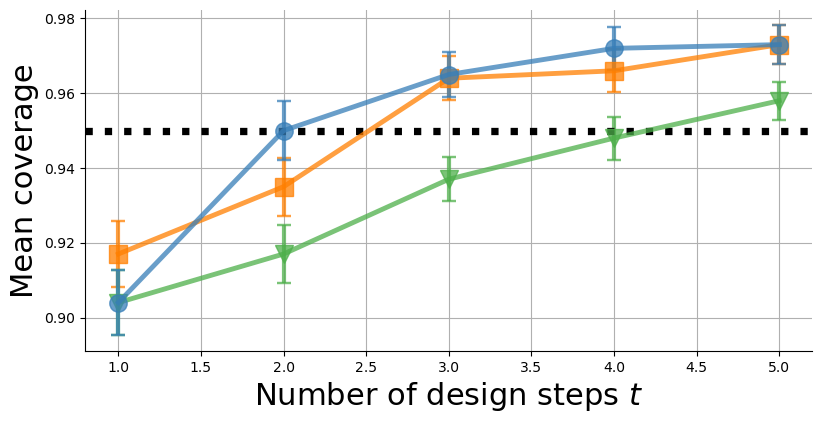

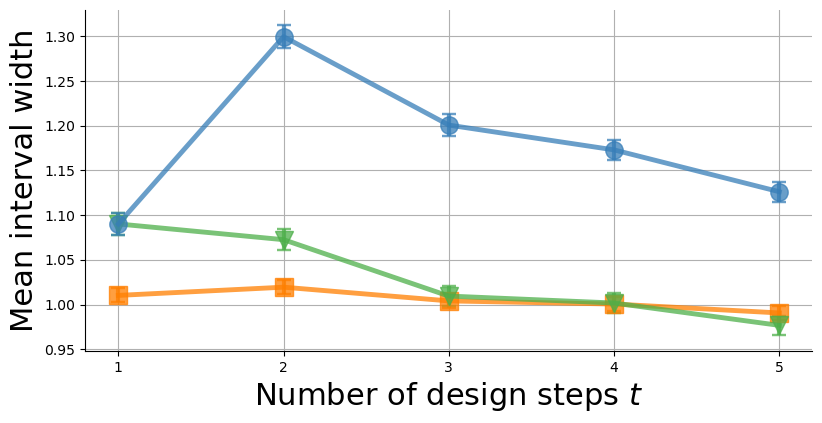

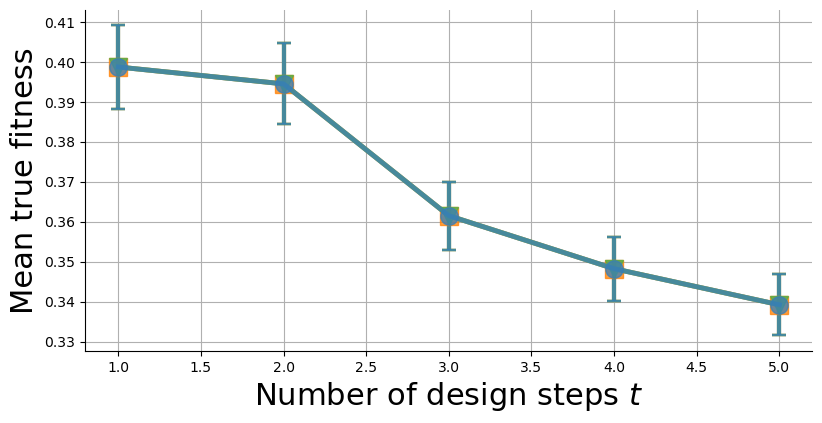

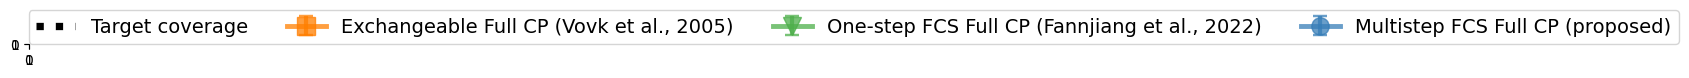

In [6]:
## Read in data
lmbda_str = '8'
reg_str = '0.01'
n_steps_str = '5'
n_seeds_str = '1000'
plt_legend = True

data = pd.read_csv('./results/2024-09-15_FullCPMFCS_FluorescentBlue_ridge_nInit32_steps5_nseed1000_lmbda8.0_reg0.01_depth2_initialDataDistributionFluorescent_newDataPointsDistributionNormal_samplingMethod1.csv')
display(data)



plt.rc("axes.spines", top=False, right=False)
# avoid Type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


muh_name = 'ridge'
ntrain = 32 ## 96, 192 ## 
metric = 'coverage'
n_seeds = len(set(data['seed']))
n_test = len(set(data['seed']))
print("num seeds = ", n_seeds)
capsize=5
capwidth=1.75
elinewidth=3



wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#ff7f00', '#4daf4a', '#377eb8',
                  '#e41a1c', '#984ea3', '#f781bf',  
                  '#999999', '#dede00', '#a65628']

## Plotting params
markersize=12.5
linewidth=3.5
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
y_ax_label_size=22
x_ax_label_size=22
n_steps = 5

tick_sizes=20
suptitle_size=26




## Coverage
Ex_FullCP_cov = data[data['method']=='full_ex'].groupby(['step']).mean()['coverage']
Ex_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_cov = data[data['method']=='full_1fcs'].groupby(['step']).mean()['coverage']
FCS1_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_cov = data[data['method']=='full_mfcs'].groupby(['step']).mean()['coverage']
MFCS_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]




## Width
Ex_FullCP_wid = data[data['method']=='full_ex'].groupby(['step']).mean()['width']
Ex_FullCP_wid_stderr = np.array(data[data['method']=='full_ex'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_wid = data[data['method']=='full_1fcs'].groupby(['step']).mean()['width']
FCS1_FullCP_wid_stderr = np.array(data[data['method']=='full_1fcs'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_wid = data[data['method']=='full_mfcs'].groupby(['step']).mean()['width']
MFCS_FullCP_wid_stderr = np.array(data[data['method']=='full_mfcs'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]



## Model performance
Ex_FullCP_fit = data[data['method']=='full_ex'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
Ex_FullCP_fit_stderr = np.array(data[data['method']=='full_ex'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_fit = data[data['method']=='full_1fcs'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
FCS1_FullCP_fit_stderr = np.array(data[data['method']=='full_1fcs'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_fit = data[data['method']=='full_mfcs'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
MFCS_FullCP_fit_stderr = np.array(data[data['method']=='full_mfcs'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]





## Plot coverage
fig1, ax1 = plt.subplots(figsize=(8, 4))
fig1.tight_layout()

(_, caps, _) = ax1.errorbar(range(1, n_steps+1), Ex_FullCP_cov[0:n_steps], marker='s', yerr = Ex_FullCP_cov_stderr[0:n_steps],  label = 'Exchangeable Full CP (Vovk et al., 2005)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax1.errorbar(range(1, n_steps+1), FCS1_FullCP_cov[0:n_steps], marker='v', yerr = FCS1_FullCP_cov_stderr[0:n_steps],  label = 'One-step FCS Full CP (Fannjiang et al., 2022)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax1.errorbar(range(1, n_steps+1), MFCS_FullCP_cov[0:n_steps], marker='o', yerr = MFCS_FullCP_cov_stderr[0:n_steps], label = 'Multistep FCS Full CP (proposed)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

ax1.axhline(y = 0.95, linestyle = ':', color = 'black', linewidth=linewidth*1.5, label='Target coverage')

handles, labels = ax1.get_legend_handles_labels()
ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
# ax1.set_ylim([0.75,1.000001])
# ax1.set_yticks(np.arange(0.7,1.000001, 0.1))
# ax1.tick_params(axis='both', labelsize=tick_sizes)
# ax1.xaxis.set_ticks(np.arange(1, 6, 1))
ax1.grid()

fig1.savefig('./results_figures/FullCPMFCS_coverage.pdf',bbox_inches='tight', dpi=300)



## Plot interval widths

fig2, ax2 = plt.subplots(figsize=(8, 4))
fig2.tight_layout()

(_, caps, _) = ax2.errorbar(range(1, n_steps+1), Ex_FullCP_wid[0:n_steps], marker='s', yerr = Ex_FullCP_wid_stderr[0:n_steps],  label = 'Exchangeable Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax2.errorbar(range(1, n_steps+1), FCS1_FullCP_wid[0:n_steps], marker='v', yerr = FCS1_FullCP_wid_stderr[0:n_steps],  label = 'One-step FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax2.errorbar(range(1, n_steps+1), MFCS_FullCP_wid[0:n_steps], marker='o', yerr = MFCS_FullCP_wid_stderr[0:n_steps], label = 'Multistep FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
ax2.xaxis.set_ticks(np.arange(1, 6, 1))

ax2.set_ylabel('Mean interval width', fontsize=y_ax_label_size)
ax2.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
# ax2.set_ylim([0,2.25])

# ax2.set_title('Title', y=1.025, fontsize=suptitle_size)

# ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.grid()

fig2.savefig('./results_figures/FullCPMFCS_width.pdf',bbox_inches='tight', dpi=300)




## Plot mean fitness
fig3, ax3 = plt.subplots(figsize=(8, 4))
fig3.tight_layout()

(_, caps, _) = ax3.errorbar(range(1, n_steps+1), Ex_FullCP_fit[0:n_steps], marker='s', yerr = Ex_FullCP_fit_stderr[0:n_steps], label = 'Exchangeable Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0],ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

(_, caps, _) = ax3.errorbar(range(1, n_steps+1), FCS1_FullCP_fit[0:n_steps], marker='v', yerr = FCS1_FullCP_fit_stderr[0:n_steps],  label = 'One-step FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1],ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
    
(_, caps, _) = ax3.errorbar(range(1, n_steps+1), MFCS_FullCP_fit[0:n_steps], marker='o', yerr = MFCS_FullCP_fit_stderr[0:n_steps], label = 'Multistep FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

ax3.set_ylabel('Mean true fitness', fontsize=y_ax_label_size)
ax3.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
# ax3.tick_params(axis='both', labelsize=tick_sizes)
# ax3.xaxis.set_ticks(np.arange(1, 6, 1))
# ax3.set_ylim([0.65,1.325])
# ax3.set_yticks(np.arange(0.8,1.3, 0.2))

ax3.grid()

fig3.savefig('./results_figures/FullCPMFCS_fitness.pdf',bbox_inches='tight', dpi=300)




## Plot legend
fig4, ax4 = plt.subplots(figsize=(0, 0))
# ax4.set_xticks([])
# ax4.set_yticks([])

order = [0, 1, 2, 3]
ax4.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[-0.05,1.225],ncol=4,fontsize=14)

fig4.savefig('./results_figures/FullCPMFCS_legend.pdf',bbox_inches='tight', dpi=200)



## Explanation for lower fitness values:

Since both your data and the paper’s data are the same, and the only difference is the method used to **sample new data points**, this discrepancy in fitness values can be explained by how **exponential sampling** versus **normal distribution sampling with noise** affects the selection process and the data structure. Here’s a deeper analysis of how these two approaches lead to differences in your observed fitness values:

### 1. **Exponential vs. Normal Sampling**:
   - **Exponential Sampling (in the paper)**:
     In the original method, new points were sampled based on an **exponential distribution** (`exp(lmbda * predall_n)`), which means that points with higher predicted utility (from previous steps) are given exponentially more weight. This approach focuses heavily on points that have a higher likelihood of having a high fitness, skewing the selection process towards more "favorable" candidates, which could explain why the **mean fitness values are higher** (around 0.8 to 1.2). Essentially, this method creates a bias towards points that are expected to be more useful based on past predictions.
   
   - **Normal Sampling with Noise (in your method)**:
     In your current approach, you are sampling new points based on a **normal distribution** around the mean of the previous points, with added noise. This approach assumes that new points should be distributed similarly to the existing data, but with random perturbations. The noise you introduce can shift the selected points towards regions with **lower predicted fitness**, leading to lower observed fitness values. Moreover, the normal distribution might be selecting points that are closer to the mean, which may not prioritize higher utility points as aggressively as the exponential sampling.

### 2. **Effect of Sampling on Fitness**:
   - **Exponential Sampling** is more **exploitative**: It concentrates on points that are expected to yield the highest results, given the model's current understanding. As a result, it systematically pushes the sampled points towards regions of higher fitness.
   
   - **Normal Sampling** with noise, on the other hand, is more **exploratory**: It introduces more randomness into the selection process, and while this helps explore the parameter space, it might pick points with **lower fitness values** more frequently, which dilutes the overall average fitness.

### 3. **Impact of Noise**:
   - Adding noise to your normal sampling might be **introducing too much randomness**, pushing some of your sampled points away from high-fitness regions. This could also explain why your mean fitness values are lower compared to the exponential method, which is more focused and less random.
   
### 4. **Bias Towards High-Fitness Regions**:
   Exponential sampling creates a strong **bias towards regions of high fitness** due to the nature of the exponential function. Small changes in predicted fitness values can lead to large differences in probability, amplifying the likelihood of selecting points with higher fitness. The normal distribution with noise doesn't have this amplification effect, and points are selected in a more **balanced and random manner**, leading to more uniform fitness values across the sampled data.

### Adjustments to Improve Results:
To make your sampling method more similar to the paper’s approach while retaining normal distribution:
1. **Control the Noise**: Reduce the amount of noise added during sampling so that it doesn't completely overshadow the fitness predictions.
2. **Introduce a Bias**: Modify your normal sampling method to introduce some **bias towards higher predicted fitness**. For example, you could skew the mean of the normal distribution based on the predicted utility, so that higher utility points are more likely to be sampled, similar to how exponential sampling works but with more smoothness.
3. **Hybrid Approach**: Consider a **hybrid approach**, where you combine the normal sampling with some exponential weighting, creating a balance between exploration (via normal sampling) and exploitation (via exponential weighting).

By introducing these adjustments, you can potentially raise the mean true fitness values closer to those observed in the paper while still using a normal distribution.